# EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import os
import sys
from pathlib import Path

path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Application_Ranking_System


## Reading the data

In [3]:
# df1 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/job_skills.csv")
# df2 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/job_summary.csv")
df = pd.read_csv(f"{path}/data/synthetic_data/synthetic_jd_resume_set1.csv")
df

,id,job_title,company,job_skills,job_summary,category,resume_text
0,340370,Software Architect,Harris Computer,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,Complete Mismatch,**Heather Hickman**\n\n**Professional Summary*...
1,340370,Software Architect,Harris Computer,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,Underwhelming,**Jennifer Sparks**\n*[Email Address]* | *[Pho...
2,340370,Software Architect,Harris Computer,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,Good Fit,# Rodney Murphy\n\n## Professional Summary\n\n...
3,340370,Software Architect,Harris Computer,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,Overqualified,# *Jennifer Arnold*\n\n**Professional Summary*...
4,640026,Senior System Engineer,ExLabs,"Systems engineering, Technical oversight, Requ...",Job Title: Sr. System Engineer\nCompany: ExLab...,Complete Mismatch,**Bianca Patterson**\n\n**Professional Summary...
...,...,...,...,...,...,...,...
1995,440051,Account Executive Digital Sales,Salem Media Group,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,Overqualified,# Todd Walters\n\n**Professional Summary**\n\n...
1996,435981,"Account Executive, Industrial Equipment",Better Talent Advisors,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",Complete Mismatch,**DOUGLAS BLAKE**\n\n**Professional Summary**\...
1997,435981,"Account Executive, Industrial Equipment",Better Talent Advisors,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",Underwhelming,# Kyle Villegas\n\n## Professional Summary\n\n...
1998,435981,"Account Executive, Industrial Equipment",Better Talent Advisors,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",Good Fit,# Charles Preston\n\n**Professional Summary**\...


In [4]:
df['id'].nunique()

500

In [5]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 2000
Number of columns in the dataset: 7


### Overview of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2000 non-null   int64 
 1   job_title    2000 non-null   object
 2   company      2000 non-null   object
 3   job_skills   2000 non-null   object
 4   job_summary  2000 non-null   object
 5   category     2000 non-null   object
 6   resume_text  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


### Null value report

In [7]:
def null_value_report(df):
    missing = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={"index": "column", 0:"Count"})
    missing['Percentage'] = missing['Count'] / df.shape[0] * 100
    display(missing)

In [8]:
null_value_report(df)

,column,Count,Percentage
0,id,0,0.0
1,job_title,0,0.0
2,company,0,0.0
3,job_skills,0,0.0
4,job_summary,0,0.0
5,category,0,0.0
6,resume_text,0,0.0


## Categorizing columns

In [9]:
def get_cardinality(df):
    unique = pd.DataFrame(df.nunique()).reset_index().rename(columns={"index": "column", 0:"Count"})
    unique['Unique Percentage'] = unique['Count'] / df.shape[0] * 100
    display(unique)

In [10]:
# get_cardinality(df)

In [11]:
ignore_columns = ["id"]
numerical_columns = []

categorical_columns = ["category", "job_title", "company"]
text_columns = ["job_skills", "job_summary", "resume_text"]

In [12]:
assert(len(numerical_columns + categorical_columns + text_columns + ignore_columns) == df.shape[1])

In [13]:
print("Number of Numerical columns:", len(numerical_columns))
print("Number of Categorical columns:", len(categorical_columns))
print("Number of Text columns:", len(text_columns))

Number of Numerical columns: 0
Number of Categorical columns: 3
Number of Text columns: 3


## EDA

### Numerical columns

In [14]:
#There are no numerical fields

#### Histograms

In [15]:
def plot_histogram(df, col, log_scale=True):
    sns.set_style("darkgrid")
    sns.histplot(data = df, x=col, bins=20)
    plt.title(f"Distribution of {col}")
    if(log_scale):
        plt.yscale("log")
    plt.show()

### Categorical columns

#### Null value report

In [16]:
null_value_report(df[categorical_columns])

,column,Count,Percentage
0,category,0,0.0
1,job_title,0,0.0
2,company,0,0.0


#### Statistics

In [17]:
df[categorical_columns].describe(include=['object'])

,category,job_title,company
count,2000,2000,2000
unique,4,51,324
top,Complete Mismatch,Senior Systems Engineer,Recruiting from Scratch
freq,500,164,280


#### Count plots

In [18]:
def plot_count(df, col):
    sns.set_style('darkgrid')
    
    # 1. Create a DataFrame for the **global** category percentages
    percentage_df = (
        df[col]
        .value_counts(normalize=True)  # Proportion of each category
        .mul(100)                      # Convert to percentage
        .rename("percentage")          # Name the column "percentage"
        .reset_index()                 # Convert series to DataFrame
        .rename(columns={"index": col}) # Rename the index column to our category name
    )
    
    # 2. Get the top 20 most frequent categories in the entire dataset
    top_categories = df[col].value_counts().nlargest(20).index.tolist()
    
    # 3. Filter the original DataFrame to include only those top 20 categories
    filtered_df = df[df[col].isin(top_categories)]
    
    # 4. Create the countplot using `order=top_categories`
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
    
    # 5. Annotate each bar with the **global** percentage
    for i, patch in enumerate(ax.patches):
        # The i-th patch corresponds to the i-th category in `top_categories`
        category = top_categories[i]
        
        # Retrieve the global percentage for this category from the percentage_df
        pct_value = percentage_df.loc[percentage_df[col] == category, "percentage"].values[0]
        
        # Bar dimensions
        bar_length = patch.get_width()  # How long the bar is (i.e., the count in `filtered_df`)
        y_center = patch.get_y() + patch.get_height() / 2  # Vertical center of the bar

        # Place the annotation a bit to the right of the bar
        ax.annotate(f"{pct_value:.1f}%", (bar_length, y_center), xytext=(5, 0), textcoords="offset points", ha="left", va="center", fontsize=10, color="black")

    # 6. Final touches: title, labels, layout
    plt.title(f"Top 20 Most Frequent Categories - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()
    plt.show()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_34580/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


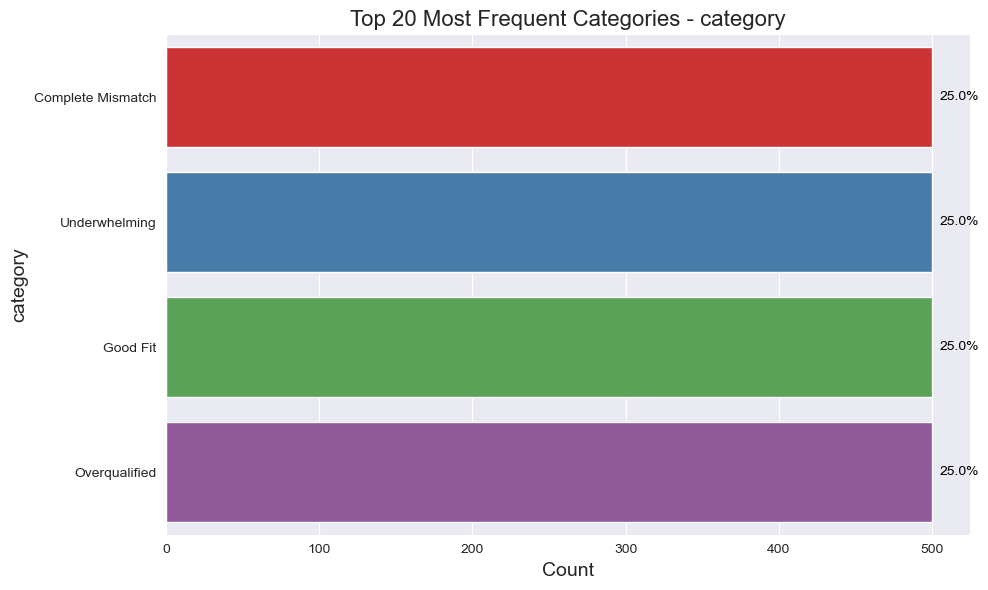

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_34580/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


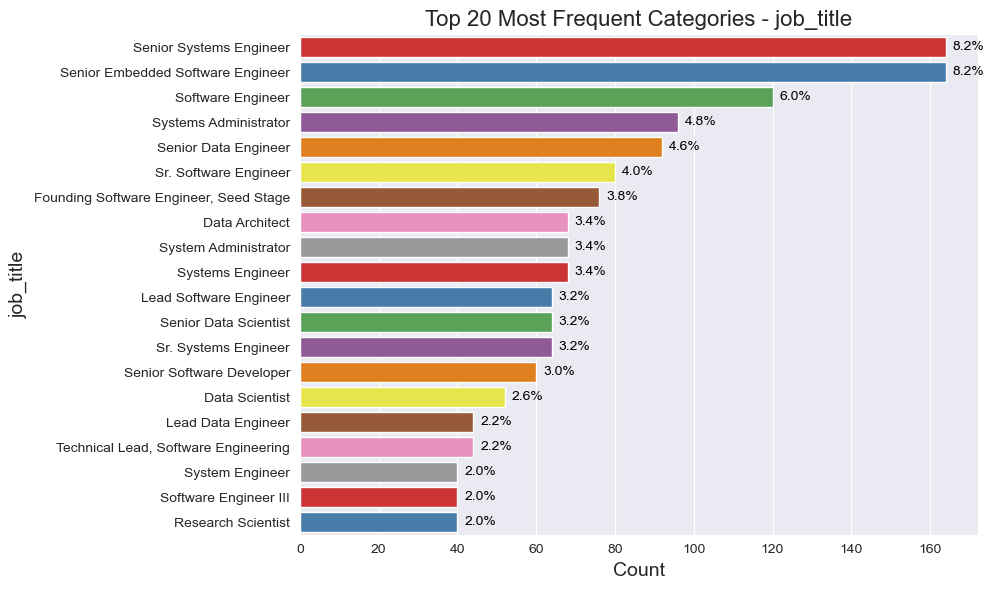

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_34580/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


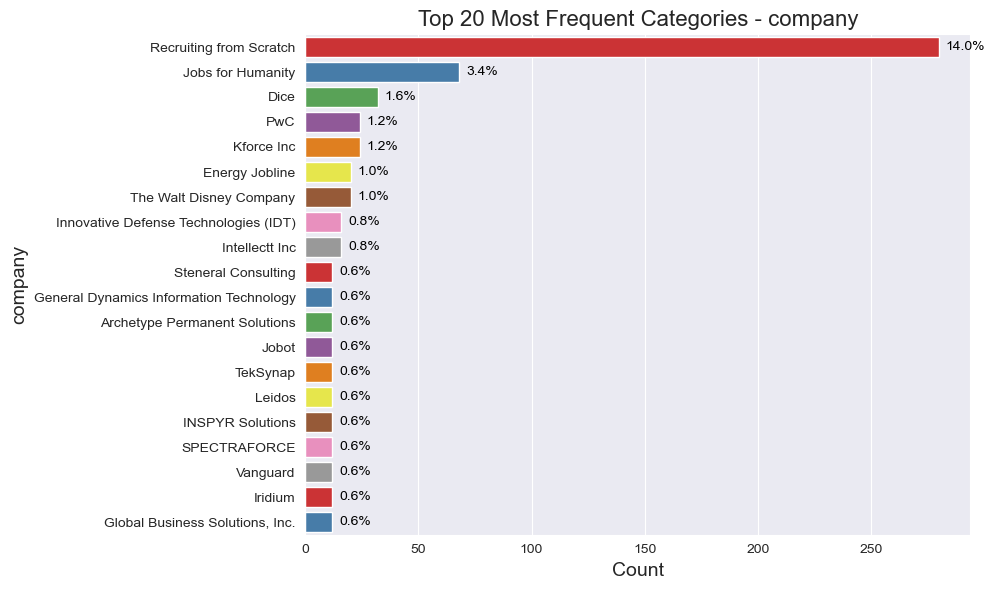

In [19]:
for i in categorical_columns:
    if(df[i].nunique() / df.shape[0] < 0.9):
        plot_count(df, i)

### Text columns

#### Null value report

In [20]:
null_value_report(df[text_columns])

,column,Count,Percentage
0,job_skills,0,0.0
1,job_summary,0,0.0
2,resume_text,0,0.0


#### Text lengths

In [21]:
temp = df[text_columns+['category']].fillna("").copy()
for i in text_columns:
    temp[f"{i}_len"] = temp[i].apply(lambda x: len(x))
    
temp[text_columns + [f"{i}_len" for i in text_columns]]

,job_skills,job_summary,resume_text,job_skills_len,job_summary_len,resume_text_len
0,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,**Heather Hickman**\n\n**Professional Summary*...,602,6407,3646
1,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,**Jennifer Sparks**\n*[Email Address]* | *[Pho...,602,6407,3316
2,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,# Rodney Murphy\n\n## Professional Summary\n\n...,602,6407,3059
3,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,# *Jennifer Arnold*\n\n**Professional Summary*...,602,6407,4187
4,"Systems engineering, Technical oversight, Requ...",Job Title: Sr. System Engineer\nCompany: ExLab...,**Bianca Patterson**\n\n**Professional Summary...,584,6308,2939
...,...,...,...,...,...,...
1995,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,# Todd Walters\n\n**Professional Summary**\n\n...,781,2451,3545
1996,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",**DOUGLAS BLAKE**\n\n**Professional Summary**\...,501,2130,2701
1997,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",# Kyle Villegas\n\n## Professional Summary\n\n...,501,2130,2847
1998,"Sales, Territory Management, Variable Frequenc...","With over 100 years in business, our family of...",# Charles Preston\n\n**Professional Summary**\...,501,2130,3137


In [22]:
temp["num_of_skills"] = temp["job_skills"].apply(lambda x: len(x.split(",")))

#### Text length statistics

In [23]:
temp[[f"{i}_len" for i in text_columns] + ["num_of_skills"]].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,job_skills_len,job_summary_len,resume_text_len,num_of_skills
count,2000.00,2000.00,2000.00,2000.00
mean,713.82,4275.73,3322.50,39.23
std,281.72,1290.10,731.46,10.12
min,254.00,2006.00,1745.00,30.00
5%,389.00,2281.00,2342.95,30.00
25%,523.00,3249.50,2787.25,32.00
50%,643.00,4084.50,3242.50,36.00
75%,831.00,5520.50,3721.00,43.00
95%,1262.05,6404.15,4623.15,60.00
max,1982.00,6965.00,7439.00,98.00


#### Text length histograms

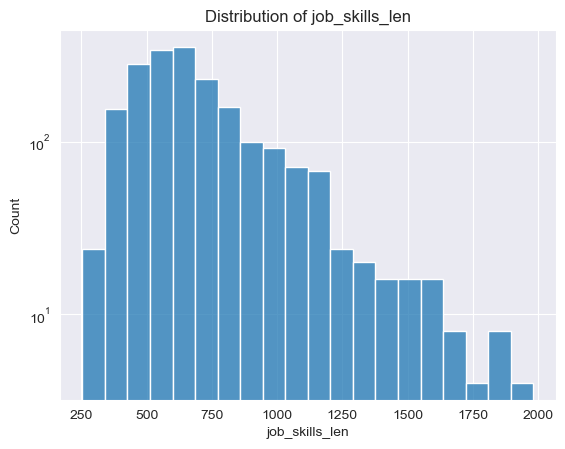

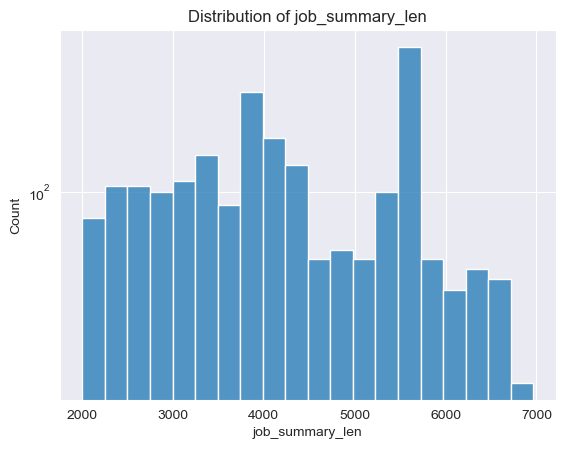

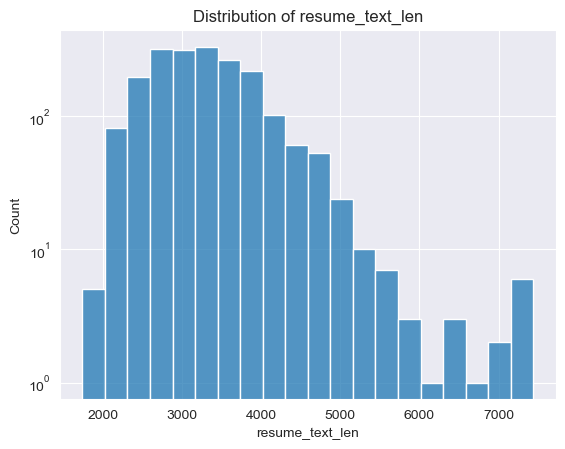

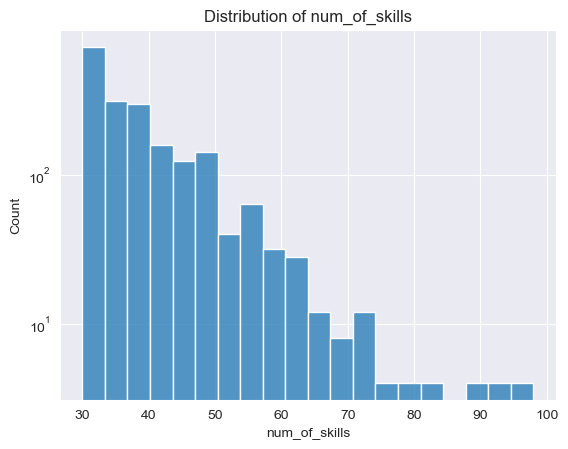

In [24]:
for i in [f"{i}_len" for i in text_columns] + ["num_of_skills"]:
    plot_histogram(temp, i)

## WordClouds

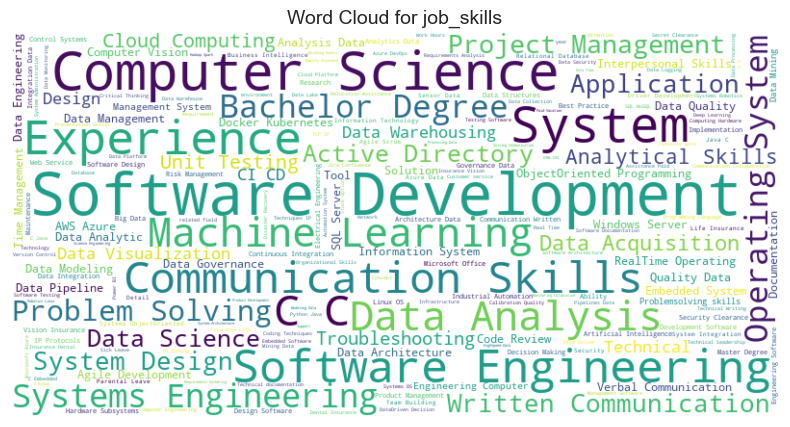

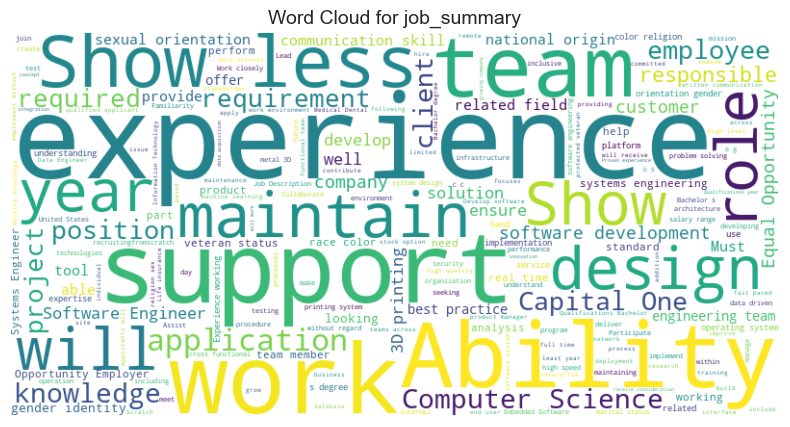

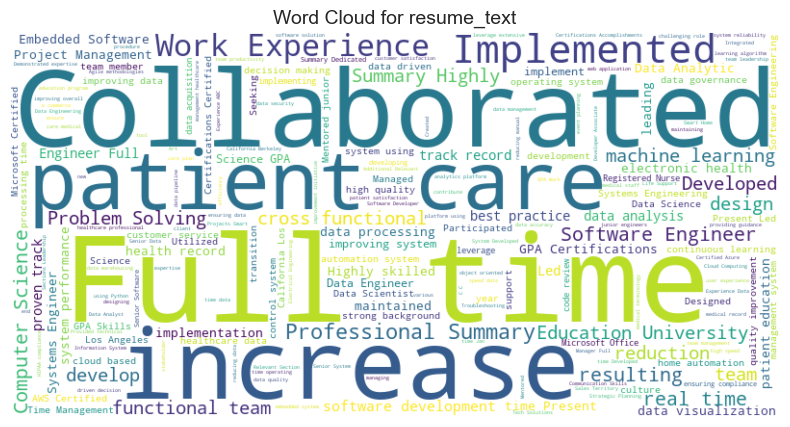

In [25]:
for col in text_columns:
    text_data = " ".join(temp[col])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title(f"Word Cloud for {col}", fontsize=14)
    plt.show()

## Analyzing Resume text

### No professional summary

In [26]:
no_prof_sum = df[~df['resume_text'].str.contains("Summary", case=False)].copy()
print("Number of resumes without professional summary:", no_prof_sum.shape[0])

Number of resumes without professional summary: 16


In [27]:
for i in range(no_prof_sum.shape[0]):
    print("Fit category:", no_prof_sum.iloc[i]['category'])
    print("Resume:\n", no_prof_sum.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Good Fit
Resume:
 # *John Butler*

**Software Engineer | Cloud Specialist | Supply Chain Solutions Expert**

**Skills:** Software Engineering, Troubleshooting, Vendor Applications, Agile Development, Cloud Computing, Supply Chain Suites, Oracle Retail, Symphony Retail AI GOLD, Software Development, Unit Testing, Functional Testing, Debugging, Documentation, Architectural Direction, Technical Component Development, Full Stack Development, FrontEnd Development, BackEnd Development, Integration, Troubleshooting, Technical Guidance, RootCause Analysis, Process Improvement, Security Remediation, Angular, AngularJS, Oracle, Java, Junit, Spring Framework, UI/UX Design, Software System Design, Software Development, Software Implementation, Scalable Systems, HighVolume Systems, ClientFacing Applications, Supply Chain ERP Systems, Java/Spring Batch, PL/SQL Development, Eclipse, Git, CI/CD, Maven, Jenkins, JSON Messaging, Web Services, SOAP, REST, Cloud Platforms, AWS, GCP, Azure, S

We can see that the resumes generated look good even though there is no professional summary present (which is a good thing)

### No Skills

In [28]:
print("Number of resumes without skills word:", df[~df['resume_text'].str.contains("Skills", case=False)].shape[0])

Number of resumes without skills word: 0


All resumes have skills word, which is most probably skills section

### No Projects

In [29]:
print("Number of resumes without Projects word:", df[~df['resume_text'].str.contains("Projects", case=False)].shape[0])

no_proj = df[~df['resume_text'].str.contains("Projects", case=False)].copy()
no_proj

Number of resumes without Projects word: 115


,id,job_title,company,job_skills,job_summary,category,resume_text
12,998553,Distinguished Applied Researcher,Jobs for Humanity,"AI, Applied Research, Machine Learning, Natura...",Company Description\nJobs for Humanity is part...,Complete Mismatch,# *Jared Gray*\n\n## Professional Summary\n\nH...
15,998553,Distinguished Applied Researcher,Jobs for Humanity,"AI, Applied Research, Machine Learning, Natura...",Company Description\nJobs for Humanity is part...,Overqualified,**James Serrano**\n*Email: james.serrano@email...
36,1235480,"Senior Software Engineer, Android",Capital One,"Android, Kotlin, Agile, Software Engineering, ...","Locations: VA - McLean, United States of Ameri...",Complete Mismatch,# Brandon Stafford\n\n## Professional Summary\...
39,1235480,"Senior Software Engineer, Android",Capital One,"Android, Kotlin, Agile, Software Engineering, ...","Locations: VA - McLean, United States of Ameri...",Overqualified,# *Kathryn Jones*\n\n**Professional Summary**\...
47,517980,Sr. Systems Engineer,General Dynamics Information Technology,"Operating Systems (OS), Systems Design, VMware...",Job Description:\nType of Requisition:\nPipeli...,Overqualified,# *Cathy Barron*\n\n**Professional Summary**\n...
...,...,...,...,...,...,...,...
1987,13071,ASSISTANT MANAGER,d'Lite Healthy On The Go,"Restaurant management, Leadership, Customer se...","Location: Scottsdale, AZ\nEmployment Type: Ful...",Overqualified,# *Kayla Davis*\n\n**Professional Summary**\n\...
1991,368698,Academic Advisor,Mount Allison University,"Academic advising, Transfer credit assessment,...",Position Description\nReporting to the Registr...,Overqualified,# *Sheena Chung*\n\n**Professional Summary**\n...
1992,440051,Account Executive Digital Sales,Salem Media Group,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,Complete Mismatch,# Andrew Rasmussen\n\n## Professional Summary\...
1995,440051,Account Executive Digital Sales,Salem Media Group,"Sales, Account Executive, Media Strategist, Bu...",Overview\nSalem Media - Washington D.C.\noffer...,Overqualified,# Todd Walters\n\n**Professional Summary**\n\n...


In [30]:
for i in range(10):
    print("Fit category:", no_proj.iloc[i]['category'])
    print("Resume:\n", no_proj.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Complete Mismatch
Resume:
 # *Jared Gray*

## Professional Summary

Highly skilled and dedicated professional with a successful career in the hospitality industry, specializing in event planning and management. Proven track record of delivering exceptional customer service and creating memorable experiences for clients. Seeking to leverage my skills in a new field and contribute to a dynamic team.

## Skills

Event planning, customer service, team management, vendor relations, budget management, menu planning, decor design, time management, problem-solving, communication, Microsoft Office, Google Suite, Event Management Software, Social Media Marketing, Sales, Hospitality, Catering, Wedding Planning, Corporate Events, Fundraising Galas, Trade Shows, Conferences, Venue Selection, Contract Negotiation, Staff Training, Inventory Control, Safety Regulations, Food Safety, Alcohol Service, First Aid/CPR Certified.

## Work Experience

*The Grand Hotel*

- *Event Manager*, Full-

Even though there are no Projects for these resumes, the resume has rich content in other sections (Except for some).

#### No work experience

In [31]:
#Check how many of these dont have any other sections
no_exp_proj = no_proj[~no_proj['resume_text'].str.contains("Work Experience", case=False)].copy()
no_exp_proj

,id,job_title,company,job_skills,job_summary,category,resume_text
59,798955,Senior Embedded Software Engineer,Recruiting from Scratch,"Embedded Software Engineering, Software Archit...",Who is Recruiting from Scratch :\nRecruiting f...,Overqualified,# **Kathryn Davis**\n\n**Professional Summary*...
106,934192,Lead Software Engineer,Dice,"Software Development, Software Design, Softwar...",Dice is the leading career destination for tec...,Good Fit,**John Ray**\n*Lead Software Engineer*\n\n**Pr...
336,564990,Systems Engineer,Open Systems Technologies Corporation,"Systems engineering, Scaled Agile Framework (S...",Open Systems Technologies Corporation is a lea...,Complete Mismatch,# *Randy Cox*\n\n**Professional Summary**\n\nH...
480,868565,Senior Embedded Software Engineer,Recruiting from Scratch,"C, C++, C++11/14/17, Embedded Systems, RealTim...",Who is Recruiting from Scratch :\nRecruiting f...,Complete Mismatch,**Greg Mitchell**\n*gregmitchell@email.com | (...
775,1158174,"Technical Lead, Software Engineering",Recruiting from Scratch,"Engineering leadership, Technical leadership, ...",Who is Recruiting from Scratch:\nRecruiting fr...,Overqualified,# Kenneth Hill\n\n**Professional Summary**\n\n...
907,880194,"Technical Lead, Software Engineering",Recruiting from Scratch,"Engineering leadership, Technical leadership, ...",Who is Recruiting from Scratch:\nRecruiting fr...,Overqualified,# William Taylor\n\n**Professional Summary**\n...
920,497948,Sr. Systems Engineer,Axos Bank,"DevOps, Troubleshooting, Software Maintenance,...",Job Summary And Opportunity\nAs our DevOps Eng...,Complete Mismatch,# Holly Harris\n\n## Professional Summary\n\nD...
932,560312,Software Architect,Netsmart,"Software Development, Agile Development, Techn...",Responsibilities\nAccountable for design and d...,Complete Mismatch,# Jessica Thompson\n\n## Professional Summary\...
1012,948101,"Manager, Data Engineering","Alex Lee, Inc.","Data Management, Data Engineering, Data Archit...",You are the IT leader responsible for ensuring...,Complete Mismatch,# Christopher Alvarado\n\n## Professional Summ...
1135,610565,"Experienced Associate, Software Engineer (Pyth...",PwC,"Risk Management, Python, R, SAS, Java, C++, C#...",Specialty/Competency:\nRisk\nIndustry/Sector:\...,Overqualified,# *Stephen Hood*\n\n**Professional Summary**\n...


In [32]:
for i in range(no_exp_proj.shape[0]):
    print("Fit category:", no_exp_proj.iloc[i]['category'])
    print("Resume:\n", no_exp_proj.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Overqualified
Resume:
 # **Kathryn Davis**

**Professional Summary**

Highly accomplished and innovative Embedded Software Engineer with 12+ years of experience in designing, developing, and implementing complex software systems. Proven track record in leading high-performance teams, driving strategic initiatives, and delivering exceptional results in fast-paced environments. Demonstrated expertise in real-time operating systems, machine instruction interfaces, and computer vision systems, consistently exceeding expectations and driving business impact.

**Skills**

Embedded Software Engineering, Software Architecture, C, C++, C++11/14/17, Real-Time Operating Systems, Object-Oriented Programming, Machine Instruction Interface, Computer Vision Systems, Sensor Data Monitoring, Calibration, Quality Data Logging, Printing System Health Monitoring, Control Algorithms Integration, FPGA Software Development, Data Acquisition, Process Data Collection and Analysis, Production Auto

### No work experience

In [33]:
no_exp = df[~df['resume_text'].str.contains("Work Experience", case=False)]
no_exp

,id,job_title,company,job_skills,job_summary,category,resume_text
59,798955,Senior Embedded Software Engineer,Recruiting from Scratch,"Embedded Software Engineering, Software Archit...",Who is Recruiting from Scratch :\nRecruiting f...,Overqualified,# **Kathryn Davis**\n\n**Professional Summary*...
106,934192,Lead Software Engineer,Dice,"Software Development, Software Design, Softwar...",Dice is the leading career destination for tec...,Good Fit,**John Ray**\n*Lead Software Engineer*\n\n**Pr...
186,1098589,Sr. Software Engineer,Software Resources,"Software Engineering, Troubleshooting, Vendor ...","Software Resources has an immediate, long term...",Good Fit,# *John Butler*\n\n**Software Engineer | Cloud...
336,564990,Systems Engineer,Open Systems Technologies Corporation,"Systems engineering, Scaled Agile Framework (S...",Open Systems Technologies Corporation is a lea...,Complete Mismatch,# *Randy Cox*\n\n**Professional Summary**\n\nH...
480,868565,Senior Embedded Software Engineer,Recruiting from Scratch,"C, C++, C++11/14/17, Embedded Systems, RealTim...",Who is Recruiting from Scratch :\nRecruiting f...,Complete Mismatch,**Greg Mitchell**\n*gregmitchell@email.com | (...
775,1158174,"Technical Lead, Software Engineering",Recruiting from Scratch,"Engineering leadership, Technical leadership, ...",Who is Recruiting from Scratch:\nRecruiting fr...,Overqualified,# Kenneth Hill\n\n**Professional Summary**\n\n...
907,880194,"Technical Lead, Software Engineering",Recruiting from Scratch,"Engineering leadership, Technical leadership, ...",Who is Recruiting from Scratch:\nRecruiting fr...,Overqualified,# William Taylor\n\n**Professional Summary**\n...
920,497948,Sr. Systems Engineer,Axos Bank,"DevOps, Troubleshooting, Software Maintenance,...",Job Summary And Opportunity\nAs our DevOps Eng...,Complete Mismatch,# Holly Harris\n\n## Professional Summary\n\nD...
932,560312,Software Architect,Netsmart,"Software Development, Agile Development, Techn...",Responsibilities\nAccountable for design and d...,Complete Mismatch,# Jessica Thompson\n\n## Professional Summary\...
1012,948101,"Manager, Data Engineering","Alex Lee, Inc.","Data Management, Data Engineering, Data Archit...",You are the IT leader responsible for ensuring...,Complete Mismatch,# Christopher Alvarado\n\n## Professional Summ...


In [34]:
for i in range(no_exp.shape[0]):
    print("Fit category:", no_exp.iloc[i]['category'])
    print("Resume:\n", no_exp.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Overqualified
Resume:
 # **Kathryn Davis**

**Professional Summary**

Highly accomplished and innovative Embedded Software Engineer with 12+ years of experience in designing, developing, and implementing complex software systems. Proven track record in leading high-performance teams, driving strategic initiatives, and delivering exceptional results in fast-paced environments. Demonstrated expertise in real-time operating systems, machine instruction interfaces, and computer vision systems, consistently exceeding expectations and driving business impact.

**Skills**

Embedded Software Engineering, Software Architecture, C, C++, C++11/14/17, Real-Time Operating Systems, Object-Oriented Programming, Machine Instruction Interface, Computer Vision Systems, Sensor Data Monitoring, Calibration, Quality Data Logging, Printing System Health Monitoring, Control Algorithms Integration, FPGA Software Development, Data Acquisition, Process Data Collection and Analysis, Production Auto

Work experience has other alternative names as Professional experience and Experience.
Any resume without work experience or project experience can be re-labelled as a bad fit.
We can also change the resume prompt template for the next set of generations to include another constraint.

## Resume Fit categories

For Complete Mismatch:


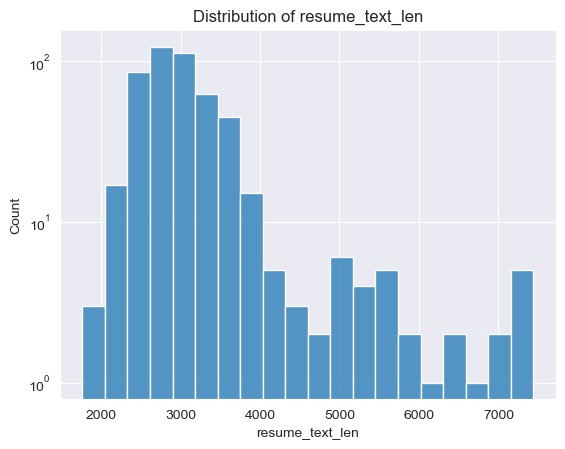

For Underwhelming:


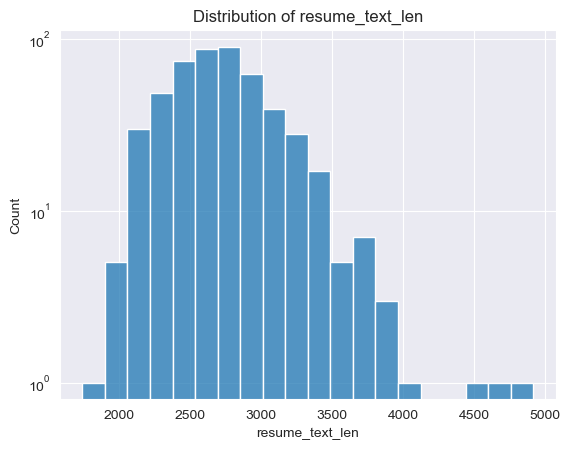

For Good Fit:


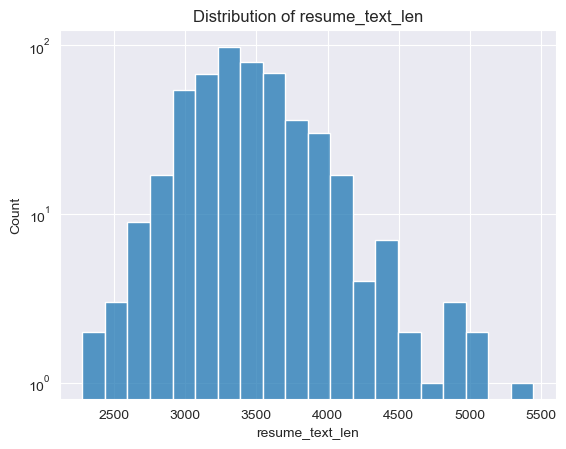

For Overqualified:


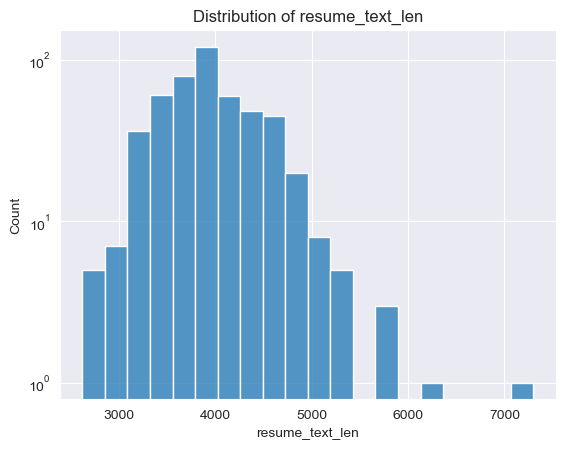

In [35]:
for i in df['category'].unique():
    print(f"For {i}:")
    plot_histogram(temp[temp['category'] == i], 'resume_text_len')

Observations:
- Most of the mismatch data belonged to healthcare background because of the example given in category requirements. (~320 of the 500 have the word patient or healthcare)
- Other categories seem to have robust synthetic data generations.
- Some text generations do not have either Projects or Work experience sections and only have skills listed. For this use case, the advantage is that we can re-label them as Bad fit category from their original label. However, adjusted the prompt for next set of generations.